In [87]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [88]:
data = fetch_california_housing(as_frame=True)
df_housing = data.frame

## 📊 Mô tả các cột dữ liệu

| Tên cột              | Giải thích |
|----------------------|------------|
| **MedInc**           | **Thu nhập trung vị** của cư dân trong khu vực (tính theo đơn vị: chục nghìn USD). Ví dụ: `8.3252` tương đương với khoảng `$83,252`. |
| **HouseAge**         | **Tuổi trung bình của các căn nhà** trong khu vực (tính bằng năm). |
| **AveRooms**         | **Số phòng trung bình** mỗi hộ dân trong khu vực. |
| **AveBedrms**        | **Số phòng ngủ trung bình** mỗi hộ dân. |
| **Population**       | **Tổng dân số** trong khu vực. |
| **AveOccup**         | **Số người trung bình** sống trong một hộ. |
| **Latitude**         | **Vĩ độ** của khu vực (tọa độ địa lý). |
| **Longitude**        | **Kinh độ** của khu vực (tọa độ địa lý). |
| **MedHouseVal**      | **Giá trị nhà trung vị** trong khu vực (tính theo đơn vị: trăm nghìn USD). |

In [89]:
df_housing["BedroomRoomRatio"] = df_housing["AveBedrms"] / df_housing["AveRooms"]

df_housing.drop(columns=["AveBedrms", "AveRooms"], inplace=True)

In [90]:
print("First 5 rows of the dataset:")
print(df_housing.head())

First 5 rows of the dataset:
   MedInc  HouseAge  Population  AveOccup  Latitude  Longitude  MedHouseVal  \
0  8.3252      41.0       322.0  2.555556     37.88    -122.23        4.526   
1  8.3014      21.0      2401.0  2.109842     37.86    -122.22        3.585   
2  7.2574      52.0       496.0  2.802260     37.85    -122.24        3.521   
3  5.6431      52.0       558.0  2.547945     37.85    -122.25        3.413   
4  3.8462      52.0       565.0  2.181467     37.85    -122.25        3.422   

   BedroomRoomRatio  
0          0.146591  
1          0.155797  
2          0.129516  
3          0.184458  
4          0.172096  


In [72]:
print("\nDataset Info:")
df_housing.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   Population        20640 non-null  float64
 3   AveOccup          20640 non-null  float64
 4   Latitude          20640 non-null  float64
 5   Longitude         20640 non-null  float64
 6   MedHouseVal       20640 non-null  float64
 7   BedroomRoomRatio  20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


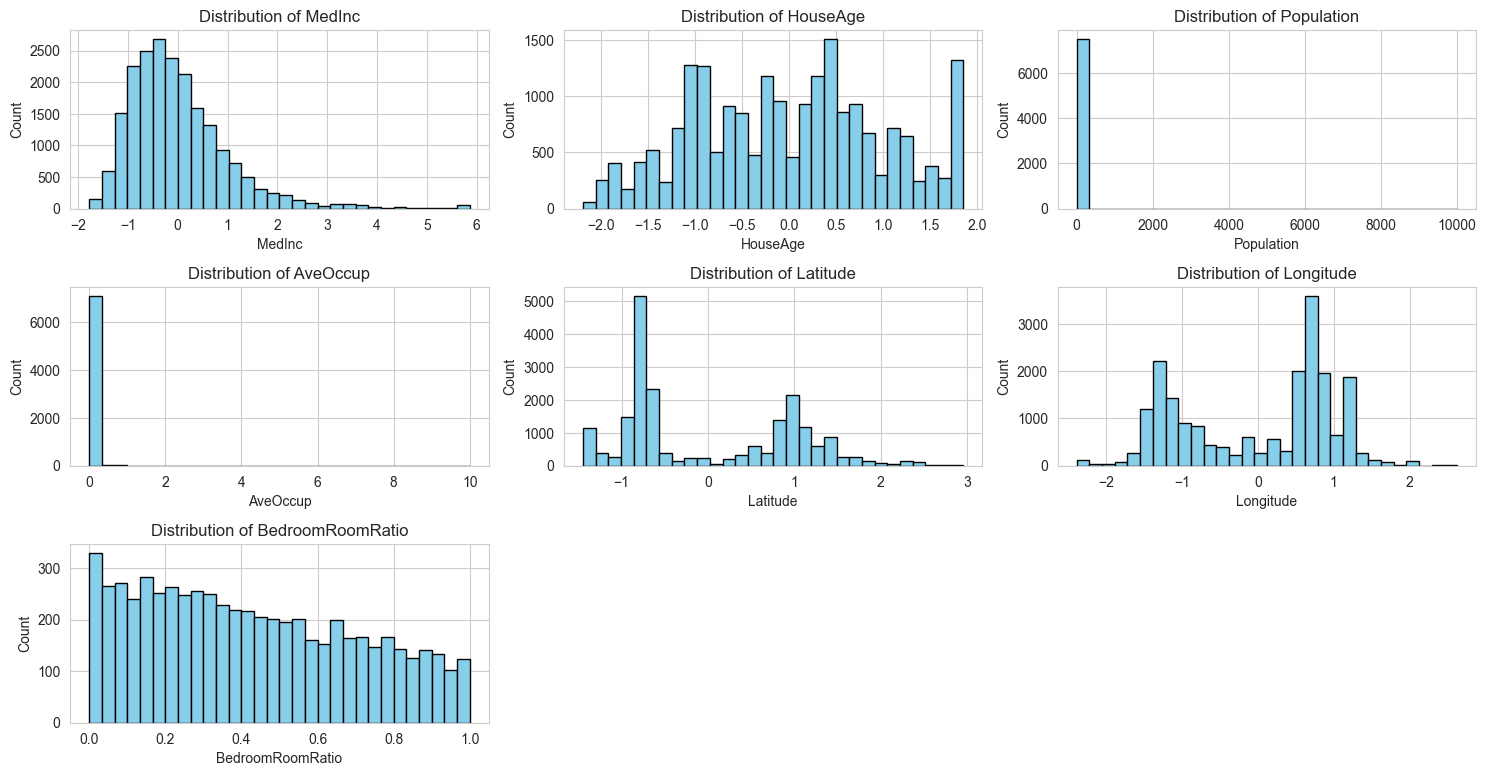

In [101]:
zoom_range = {
    "BedroomRoomRatio": (0, 1),
    "AveOccup": (0, 10),
    "Population": (0, 10000)
}

plt.figure(figsize=(15, 10))
features = df_housing.columns

for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    if feature in zoom_range:
        plt.hist(df_housing[feature], bins=30, range=zoom_range[feature], color='skyblue', edgecolor='black')
    else:
        plt.hist(df_housing[feature], bins=30, color='skyblue', edgecolor='black')

    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [94]:
def compute_living_score(df, use_price=False):
    score = (
            0.4 * df["MedInc"]
            - 0.1 * df["HouseAge"]
            - 0.3 * df["BedroomRoomRatio"] +
            - 0.2 * df["Population"] / 1000
            - 0.2 * df["AveOccup"]
            + 0.05 * df["Latitude"]
            + 0.05 * df["Longitude"]
    )
    if use_price:
        score -= 0.3 * df["MedHouseVal"]

    df["LivingScore"] = score
    return df


def assign_living_level(df, method="qcut"):
    if "LivingScore" not in df.columns:
        raise ValueError("LivingScore not found. Run compute_living_score() first.")

    if method == "qcut":
        df["LivingLevel"] = pd.qcut(df["LivingScore"], q=3, labels=["Low", "Medium", "High"])
    elif method == "cut":
        # Bạn có thể điều chỉnh ngưỡng theo describe()
        df["LivingLevel"] = pd.cut(
            df["LivingScore"],
            bins=[-np.inf, -7.2, -4.8, np.inf],
            labels=["Low", "Medium", "High"]
        )
    else:
        raise ValueError("method must be 'qcut' or 'cut'")

    return df

In [102]:
feature_columns = [
    "MedInc",
    "HouseAge",
    "Population",
    "AveOccup",
    "Latitude",
    "Longitude",
    # "MedHouseVal",
    "BedroomRoomRatio"
]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_housing[feature_columns]), columns=feature_columns)

In [103]:
df_housing = compute_living_score(df_housing, use_price=True)

KeyError: 'MedHouseVal'

In [76]:
print(df_housing_updated["LivingScore"].describe())


count    20640.000000
mean        -7.096289
std          2.552500
min       -255.242554
25%         -8.136101
50%         -7.116081
75%         -5.981609
max         -0.051516
Name: LivingScore, dtype: float64


In [77]:
assign_living_level(df_housing_updated)

,MedInc,HouseAge,Population,AveOccup,Latitude,Longitude,MedHouseVal,BedroomRoomRatio,LivingScore,LivingLevel
0,8.3252,41.0,322.0,2.555556,37.88,-122.23,4.526,0.146591,-6.964708,Medium
1,8.3014,21.0,2401.0,2.109842,37.86,-122.22,3.585,0.155797,-5.021847,High
2,7.2574,52.0,496.0,2.802260,37.85,-122.24,3.521,0.129516,-8.271347,Low
3,5.6431,52.0,558.0,2.547945,37.85,-122.25,3.413,0.184458,-8.863187,Low
4,3.8462,52.0,565.0,2.181467,37.85,-122.25,3.422,0.172096,-9.509042,Low
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,845.0,2.560606,39.48,-121.09,0.781,0.224625,-6.939189,Medium
20636,2.5568,18.0,356.0,3.122807,39.49,-121.21,0.771,0.215208,-5.854904,High
20637,1.7000,17.0,1007.0,2.325635,39.43,-121.22,0.923,0.215173,-6.117479,High
20638,1.8672,18.0,741.0,2.123209,39.43,-121.32,0.847,0.219892,-6.040530,High


<Axes: xlabel='LivingLevel', ylabel='LivingScore'>

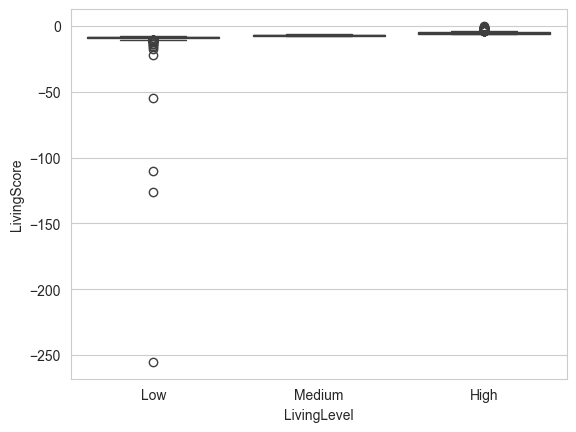

In [78]:
sns.boxplot(data=df_housing_updated, x="LivingLevel", y="LivingScore")

<Axes: xlabel='LivingLevel', ylabel='MedHouseVal'>

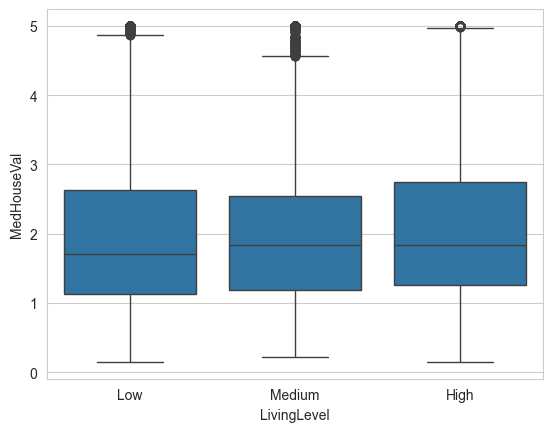

In [79]:
sns.boxplot(data=df_housing_updated, x="LivingLevel", y="MedHouseVal")

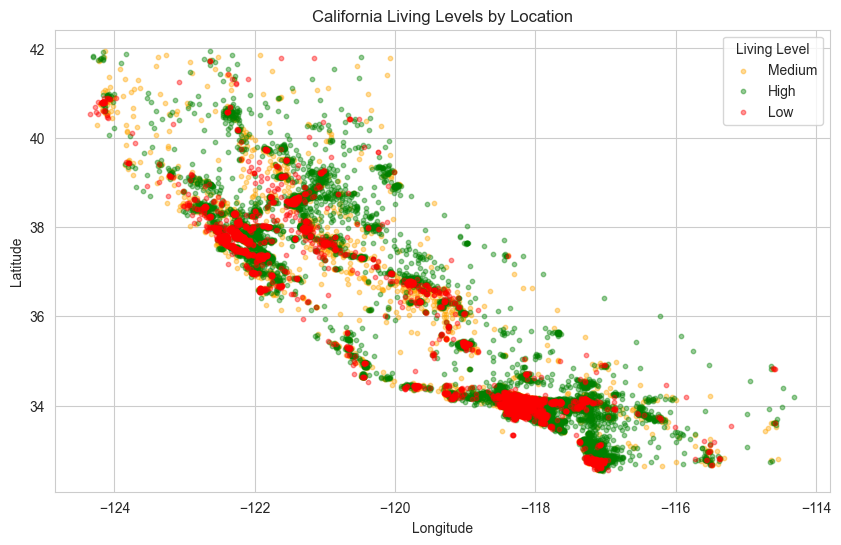

In [80]:
colors = {"Low": "red", "Medium": "orange", "High": "green"}

plt.figure(figsize=(10, 6))
for level in df_housing_updated["LivingLevel"].unique():
    subset = df_housing_updated[df_housing_updated["LivingLevel"] == level]
    plt.scatter(
        subset["Longitude"], subset["Latitude"],
        c=colors[level], label=level, alpha=0.4, s=10
    )

plt.title("California Living Levels by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Living Level")
plt.grid(True)
plt.show()

In [81]:
df_housing_updated.to_csv("./dataset/housing.csv", index=False)
print("✅ File đã lưu")

✅ File đã lưu
